## Language Analysis of Alexithymic Discourse

<hr>

Alexithymic Language Project / raul@psicobotica.com / V2 release (sept 2020)

<hr>

### Dataset preprocessing

- Dataset load / cleansing. 
- Apply participant inclusion/exclusion criteria. 
- Descriptive analysis.
- Dichotomous / class variable calculation (pos/neg alexithymia). 
- Text Processing: Tokenization. 
- Text Processing: Stop words. 
- Text Processing: Stemming. 
- Text Processing: POS Tagging. 
- Text Processing: NER Tagging. 
- Text Processing: Lexical Parsing.
- Text Processing: Dependency Parsing.


### Dataset load

In [1]:
import pandas as pd 
import numpy as np
from scipy import stats

from sklearn.metrics import cohen_kappa_score

%matplotlib inline
import matplotlib.pyplot as plt 

In [2]:
prolexitim_dataset_path = "https://raw.githubusercontent.com/raul-arrabales/alexithymic-lang/master/data/Prolexitim_v2_tagged.csv"

alex_df = pd.read_csv(prolexitim_dataset_path, header=0, delimiter=";")

In [3]:
# Keep only adults
alex_df = alex_df.drop(alex_df[alex_df.Age < 18].index) 
alex_df = alex_df.drop(alex_df[alex_df.Age > 65].index) 

In [4]:
alex_df.head()

,Code,TAS20,F1,F2,F3,Gender,Age,Card,T_Metaphors,T_ToM,T_FP,T_Interpret,T_Desc,T_Confussion,Text
0,bc39e22ca5dba59fbd97c27987878f56,40,16,9,15,2,22,1,0,1,0,1,0,0,es un niño pensando en cual es la respuesta de...
1,bc39e22ca5dba59fbd97c27987878f56,40,16,9,15,2,22,9VH,0,0,0,1,0,0,soldados descansando.
2,bc39e22ca5dba59fbd97c27987878f56,40,16,9,15,2,22,11,0,0,0,0,1,0,Una cascada.
3,bc39e22ca5dba59fbd97c27987878f56,40,16,9,15,2,22,13HM,0,1,0,0,0,0,hombre llorando porque su mujer ha muerto.
4,20cd825cadb95a71763bad06e142c148,40,12,10,18,2,22,1,0,1,0,0,0,0,un Niño cansado de estudiar y presionado por s...


In [5]:
alex_df.count()

Code            396
TAS20           396
F1              396
F2              396
F3              396
Gender          396
Age             396
Card            396
T_Metaphors     396
T_ToM           396
T_FP            396
T_Interpret     396
T_Desc          396
T_Confussion    396
Text            396
dtype: int64

In [6]:
alex_df.isnull().values.any()

False

In [7]:
df_na = alex_df[alex_df.isna().any(axis=1)]
df_null = alex_df[alex_df.isnull().any(axis=1)]
df_na

,Code,TAS20,F1,F2,F3,Gender,Age,Card,T_Metaphors,T_ToM,T_FP,T_Interpret,T_Desc,T_Confussion,Text


### Gender and Age stats

In [8]:
alex_df.Age.describe()

count    396.000000
mean      34.664141
std       12.310367
min       18.000000
25%       24.000000
50%       35.500000
75%       43.000000
max       61.000000
Name: Age, dtype: float64

In [9]:
# alex_df.Age.plot.hist(by=None, bins=20)

In [10]:
alex_df.Gender.value_counts()

2    254
1    142
Name: Gender, dtype: int64

### Build categorical TAS-20 variables

**Cutoff scoring - Criterion A** (column Alex-A):

Bagby, R. M., Parker, J. D. A. & Taylor, G. J. (1994). The twenty-item Toronto Alexithymia Scale-I. Item selection and cross-validation of the factor structure. Journal of Psychosomatic Research, 38, 23-32.

- Equal to or less than 51 = non-alexithymia.
- Scores of 52 to 60 = possible alexithymia.
- Equal to or greater than 61 = alexithymia.

Expressed into a dichotomous variable: 
- Positive (TAS-20 >= 61)
- Negative (TAS-20 < 61)


**Cutoff scoring - Criterion B** (column Alex-B):

Loas, G., Otmani, O., Fremaux, D., Lecercle, C., Duflot, M., & Delahousse, J. (1996). External validity, reliability and basic score determination of the Toronto Alexithymia Scales (TAS and TAS-20) in a group of alcoholic patients. L'Encephale, 22(1), 35-40.

- Score less that 44 for non-alexithymia has been also considered.
- Scores of 45 to 55 = possible alexithymia.
- Equal to or greater than 56 = alexithymia.

Expressed into a dichotomous variable: 
- Positive (TAS-20 >= 56)
- Negative (TAS-20 < 56)

In [11]:
alex_df['Alex_A'] = np.where(alex_df['TAS20']>=61, 1, 0)
alex_df['Alex_B'] = np.where(alex_df['TAS20']>=56, 1, 0)

In [12]:
# How much the two criteria differ? 

# Point biserial correlation
stats.pointbiserialr( alex_df.Alex_A, alex_df.Alex_B )

PointbiserialrResult(correlation=0.8714893406611904, pvalue=5.561988739894539e-124)

In [13]:
# alex_df[['Alex_A', 'Alex_B']].corr()

In [14]:
# Inter-rater reliability
cohen_kappa_score( alex_df.Alex_A, alex_df.Alex_B )

0.8633093525179856

In [15]:
alex_df.Alex_A.value_counts()

0    316
1     80
Name: Alex_A, dtype: int64

In [16]:
alex_df.Alex_B.value_counts()

0    297
1     99
Name: Alex_B, dtype: int64

### Document features

In [17]:
# Add text length in words
alex_df['Words'] = alex_df.apply(lambda row: len(row.Text.split()), axis=1)

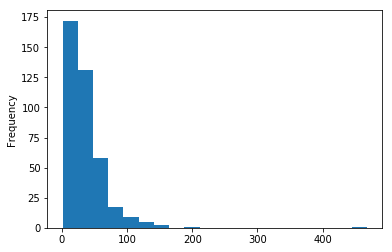

In [18]:
alex_df.Words.plot.hist(by=None, bins=20)

In [19]:
alex_df.Words.describe()

count    396.000000
mean      35.575758
std       35.013586
min        1.000000
25%       16.000000
50%       28.000000
75%       45.250000
max      468.000000
Name: Words, dtype: float64

In [20]:
# Add text length in sentences
alex_df['Sentences'] = alex_df.apply(lambda row: len(row.Text.split('.')), axis=1)

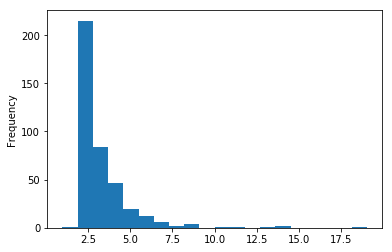

In [21]:
alex_df.Sentences.plot.hist(by=None, bins=20)

In [22]:
alex_df.Sentences.describe()

count    396.000000
mean       3.063131
std        1.915574
min        1.000000
25%        2.000000
50%        2.000000
75%        3.000000
max       19.000000
Name: Sentences, dtype: float64

## Text Processing

In [23]:
# Using nltk for text processing
import nltk
from nltk.tokenize import RegexpTokenizer 
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tag.stanford import StanfordPOSTagger

### Tokenization

In [24]:
# Reg Exp Tokenizer
tokenizer = RegexpTokenizer(r'\w+')

In [25]:
# Add column with list of tokens for each document
alex_df['Tokens'] = alex_df.apply(lambda row: tokenizer.tokenize(row.Text.lower()), axis=1) 

### Stop words

In [26]:
# Stop words in Spanish 
es_stop = set(stopwords.words('spanish'))

In [27]:
# Add column with list of stopped tokens for each document
alex_df['Tokens_Stop'] = alex_df.apply(lambda row: [i for i in row.Tokens if not i in es_stop], axis=1) 

### Stemming

In [28]:
# Porter stemmer
p_stemmer = PorterStemmer() 

In [29]:
# Add column with list of stemmed tokens for each document
alex_df['Tokens_Stem'] = alex_df.apply(lambda row: [p_stemmer.stem(i) for i in row.Tokens_Stop], axis=1) 

### POS Tagging

In [30]:
# POS Tagging load (prep)
# Stanford POS tagger is a JAVA class invoked by nltk
import os
java_path = "C:\Program Files (x86)\Common Files\Oracle\Java\javapath"
os.environ['JAVAHOME'] = java_path

In [31]:
# POS Tagging load 

spanish_postagger = StanfordPOSTagger('models/spanish.tagger', 'stanford-postagger.jar')

In [32]:
spanish_postagger.tag('Esta es la frase más complicada del mundo.'.split())

[('Esta', 'PRON'),
 ('es', 'AUX'),
 ('la', 'DET'),
 ('frase', 'NOUN'),
 ('más', 'ADV'),
 ('complicada', 'ADJ'),
 ('del', 'ADP'),
 ('mundo.', 'PROPN')]

In [33]:
# Add column with POS Tagging
alex_df['POS'] = alex_df.apply(lambda row: spanish_postagger.tag(row.Text.lower().split()), axis=1) 

In [199]:
# alex_df

In [200]:
# Perform pos tagging with the server
pos_tagger_srv = CoreNLPParser(url='http://localhost:9000', tagtype='pos')

In [202]:
# Add column with POS Tagging (server)
alex_df['POS'] = alex_df.apply(lambda row: pos_tagger_srv.tag(row.Text.lower().split()), axis=1) 

In [204]:
# alex_df

### Named Entity Recognition (NER)

In [35]:
from nltk.tag.stanford import StanfordNERTagger

In [42]:
# spanish_ner_tagger = StanfordNERTagger('models/spanish.ancora.distsim.s512.crf.ser.gz', 'stanford-ner.jar', encoding='utf8')

spanish_ner_tagger = StanfordNERTagger('models/spanish.kbp.ancora.distsim.s512.crf.ser.gz', 'stanford-ner.jar', encoding='utf8') 

In [65]:
spanish_ner_tagger.tag('Jorge Perez era amigo de Bill Gates, pero luego se fue a Croacia, que es parte de la Unión Europea'.split())

[('Jorge', 'PERSON'),
 ('Perez', 'PERSON'),
 ('era', 'O'),
 ('amigo', 'O'),
 ('de', 'O'),
 ('Bill', 'PERSON'),
 ('Gates,', 'PERSON'),
 ('pero', 'O'),
 ('luego', 'O'),
 ('se', 'O'),
 ('fue', 'O'),
 ('a', 'O'),
 ('Croacia,', 'O'),
 ('que', 'O'),
 ('es', 'O'),
 ('parte', 'O'),
 ('de', 'O'),
 ('la', 'O'),
 ('Unión', 'ORGANIZATION'),
 ('Europea', 'ORGANIZATION')]

In [43]:
# Add column with NER Tagging
alex_df['NER'] = alex_df.apply(lambda row: spanish_ner_tagger.tag(row.Text.lower().split()), axis=1) 

In [50]:
wc = 0
for i in alex_df.NER:
    for j in i:
        wc += 1
        if j[1] != 'O':
            print('Word: ' + j[0] + ", Entity: " + j[1])
print('%d words processed' % wc)

Word: jorge, Entity: PERSON
14088 words processed


In [191]:
# Same net tagging, now via server (just checking performance)
ner_tagger_srv = CoreNLPParser(url='http://localhost:9000', tagtype='ner') 

In [193]:
list(ner_tagger_srv.tag('Jorge Perez era amigo de Bill Gates, pero luego se fue a Croacia, que es parte de la Unión Europea'.split()))

[('Jorge', 'PERSON'),
 ('Perez', 'PERSON'),
 ('era', 'O'),
 ('amigo', 'O'),
 ('de', 'O'),
 ('Bill', 'PERSON'),
 ('Gates', 'PERSON'),
 (',', 'O'),
 ('pero', 'O'),
 ('luego', 'O'),
 ('se', 'O'),
 ('fue', 'O'),
 ('a', 'O'),
 ('Croacia', 'COUNTRY'),
 (',', 'O'),
 ('que', 'O'),
 ('es', 'O'),
 ('parte', 'O'),
 ('de', 'O'),
 ('la', 'O'),
 ('Unión', 'ORGANIZATION'),
 ('Europea', 'ORGANIZATION')]

In [195]:
# Add column with NER Tagging (from server)
alex_df['NER'] = alex_df.apply(lambda row: ner_tagger_srv.tag(row.Text.lower().split()), axis=1) 

In [198]:
wc = 0
for i in alex_df.NER:
    for j in i:
        wc += 1
        if j[1] != 'O':
            print('Word: ' + j[0] + ", Entity: " + j[1])
print('%d words processed' % wc)

Word: 10, Entity: NUMBER
Word: profesor, Entity: TITLE
Word: profesor, Entity: TITLE
Word: mañana, Entity: DATE
Word: dos, Entity: NUMBER
Word: mañana, Entity: DATE
Word: 15, Entity: NUMBER
Word: mañana, Entity: DATE
Word: cáncer, Entity: CAUSE_OF_DEATH
Word: río, Entity: TITLE
Word: mañana, Entity: DATE
Word: dos, Entity: NUMBER
Word: batería, Entity: TITLE
Word: río, Entity: TITLE
Word: mañana, Entity: DATE
Word: cuatro, Entity: NUMBER
Word: profesor, Entity: TITLE
Word: profesor, Entity: TITLE
Word: cuatro, Entity: NUMBER
Word: dos, Entity: NUMBER
Word: tren, Entity: CRIMINAL_CHARGE
Word: dos, Entity: NUMBER
Word: dibujante, Entity: TITLE
Word: mañana, Entity: DATE
Word: asesino, Entity: CRIMINAL_CHARGE
Word: en, Entity: CRIMINAL_CHARGE
Word: serie, Entity: CRIMINAL_CHARGE
Word: 4, Entity: NUMBER
Word: domingo, Entity: DATE
Word: río, Entity: TITLE
Word: río, Entity: TITLE
Word: río, Entity: TITLE
Word: tortura, Entity: CRIMINAL_CHARGE
Word: soldado, Entity: TITLE
Word: dos, Entity:

### Lexical Parsing

In [ ]:
# Running the Stanford CoreNLP server in localhost:
# With Spanish models
# java -mx6g -cp "*" edu.stanford.nlp.pipeline.StanfordCoreNLPServer 
#    -serverProperties StanfordCoreNLP-spanish.properties 
#    -port 9000 
#    -timeout 15000

In [93]:
from nltk.parse import CoreNLPParser

In [96]:
# Lexical Parser
spanish_parser = CoreNLPParser(url='http://localhost:9000')

In [110]:
list(parser.raw_parse('Esta es la frase más complicada del mundo.'))

[Tree('ROOT', [Tree('sentence', [Tree('sn', [Tree('grup.nom', [Tree('PRON', ['Esta'])])]), Tree('grup.verb', [Tree('AUX', ['es'])]), Tree('sn', [Tree('spec', [Tree('DET', ['la'])]), Tree('grup.nom', [Tree('NOUN', ['frase']), Tree('s.a', [Tree('s.a', [Tree('spec', [Tree('ADV', ['más'])]), Tree('grup.a', [Tree('ADJ', ['complicada'])])]), Tree('sp', [Tree('prep', [Tree('ADP', ['del'])]), Tree('sn', [Tree('grup.nom', [Tree('NOUN', ['mundo'])])])])])])]), Tree('PUNCT', ['.'])])])]

In [119]:
# In principle, we don't need the lexical tree as part of the dataset

### Dependency Parsing

In [99]:
# Neural Dependency Parser
from nltk.parse.corenlp import CoreNLPDependencyParser

dep_parser = CoreNLPDependencyParser(url='http://localhost:9000')

In [111]:
parses = dep_parser.parse('Esta es la frase más complicada del mundo.'.split())
[[(governor, dep, dependent) for governor, dep, dependent in parse.triples()] for parse in parses]

[[(('frase', 'NOUN'), 'nsubj', ('Esta', 'PRON')),
  (('frase', 'NOUN'), 'cop', ('es', 'AUX')),
  (('frase', 'NOUN'), 'det', ('la', 'DET')),
  (('frase', 'NOUN'), 'amod', ('complicada', 'ADJ')),
  (('complicada', 'ADJ'), 'advmod', ('más', 'ADV')),
  (('frase', 'NOUN'), 'nmod', ('mundo', 'NOUN')),
  (('mundo', 'NOUN'), 'case', ('del', 'ADP')),
  (('frase', 'NOUN'), 'punct', ('.', 'PUNCT'))]]

In [123]:
def getDepList(tokens):
    parses = dep_parser.parse(tokens)
    return [[(governor, dep, dependent) for governor, dep, dependent in parse.triples()] for parse in parses]

In [124]:
# Add column with Dependency Parsing
alex_df['DEP'] = alex_df.apply(lambda row: getDepList(row.Text.lower().split()), axis=1) 

In [190]:
alex_df.head()

,Code,TAS20,F1,F2,F3,Gender,Age,Card,T_Metaphors,T_ToM,...,Alex_A,Alex_B,Words,Sentences,Tokens,Tokens_Stop,Tokens_Stem,POS,NER,DEP
0,bc39e22ca5dba59fbd97c27987878f56,40,16,9,15,2,22,1,0,1,...,0,0,16,2,"[es, un, niño, pensando, en, cual, es, la, res...","[niño, pensando, respuesta, deberes, sabe]","[niño, pensando, respuesta, deber, sabe]","[(es, AUX), (un, DET), (niño, NOUN), (pensando...","[(es, O), (un, O), (niño, O), (pensando, O), (...","[[(('niño', 'NOUN'), cop, ('es', 'AUX')), (('n..."
1,bc39e22ca5dba59fbd97c27987878f56,40,16,9,15,2,22,9VH,0,0,...,0,0,2,2,"[soldados, descansando]","[soldados, descansando]","[soldado, descansando]","[(soldados, NOUN), (descansando., ADP)]","[(soldados, O), (descansando., O)]","[[(('descansando', 'VERB'), nsubj, ('soldados'..."
2,bc39e22ca5dba59fbd97c27987878f56,40,16,9,15,2,22,11,0,0,...,0,0,2,2,"[una, cascada]",[cascada],[cascada],"[(una, DET), (cascada., NOUN)]","[(una, O), (cascada., O)]","[[(('cascada', 'NOUN'), det, ('una', 'DET')), ..."
3,bc39e22ca5dba59fbd97c27987878f56,40,16,9,15,2,22,13HM,0,1,...,0,0,7,2,"[hombre, llorando, porque, su, mujer, ha, muerto]","[hombre, llorando, mujer, muerto]","[hombr, llorando, mujer, muerto]","[(hombre, NOUN), (llorando, VERB), (porque, SC...","[(hombre, O), (llorando, O), (porque, O), (su,...","[[(('llorando', 'VERB'), nsubj, ('hombre', 'NO..."
4,20cd825cadb95a71763bad06e142c148,40,12,10,18,2,22,1,0,1,...,0,0,29,4,"[un, niño, cansado, de, estudiar, y, presionad...","[niño, cansado, estudiar, presionado, padres, ...","[niño, cansado, estudiar, presionado, padr, tr...","[(un, DET), (niño, NOUN), (cansado, ADJ), (de,...","[(un, O), (niño, O), (cansado, O), (de, O), (e...","[[(('niño', 'NOUN'), det, ('un', 'DET')), (('n..."


### Dependency graph visualization

In [186]:
# ! pip install Graphviz
# ! pip install pydot
os.environ["PATH"] += os.pathsep + 'C:\\Program Files\\Graphviz 2.44.1\\bin'

from graphviz import Digraph
from IPython.display import Image
import pydot

In [144]:
# dot = Digraph()
# dot.node('1')
# dot.node('2')
# dot.edges(['12'])
# dot

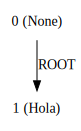

In [146]:
parse = next(dep_parser.raw_parse("Hola"))
parse

In [164]:
dep = next(dep_parser.raw_parse("Esta es una frase muy poco complicada."))
list(dep.triples())

[(('frase', 'NOUN'), 'nsubj', ('Esta', 'PRON')),
 (('frase', 'NOUN'), 'cop', ('es', 'AUX')),
 (('frase', 'NOUN'), 'det', ('una', 'DET')),
 (('frase', 'NOUN'), 'amod', ('complicada', 'ADJ')),
 (('complicada', 'ADJ'), 'advmod', ('poco', 'ADV')),
 (('poco', 'ADV'), 'advmod', ('muy', 'ADV')),
 (('frase', 'NOUN'), 'punct', ('.', 'PUNCT'))]

In [166]:
dep.tree().draw()

In [167]:
dep.to_dot()

'digraph G{\nedge [dir=forward]\nnode [shape=plaintext]\n\n0 [label="0 (None)"]\n0 -> 4 [label="ROOT"]\n1 [label="1 (Esta)"]\n2 [label="2 (es)"]\n3 [label="3 (una)"]\n4 [label="4 (frase)"]\n4 -> 1 [label="nsubj"]\n4 -> 2 [label="cop"]\n4 -> 3 [label="det"]\n4 -> 7 [label="amod"]\n4 -> 8 [label="punct"]\n5 [label="5 (muy)"]\n6 [label="6 (poco)"]\n6 -> 5 [label="advmod"]\n7 [label="7 (complicada)"]\n7 -> 6 [label="advmod"]\n8 [label="8 (.)"]\n}'

In [205]:
(graph,) = pydot.graph_from_dot_data(dep.to_dot())
Image(graph.create_png())

FileNotFoundError: [WinError 2] "dot" not found in path.

### Exlusion criteria (word count)

In [206]:
# Exclusion criteria: get rid of too short and too long narratives. 

wc_lowerLimit = 5
wc_upperLimit = alex_df.Words.mean() + 4 * alex_df.Words.std() # around 175

selected_df = alex_df[(alex_df.Words > wc_lowerLimit) & (alex_df.Words < wc_upperLimit)]

In [207]:
print('%d rows deleted. %d remaining.' % (alex_df.Code.count() - selected_df.Code.count(), selected_df.Code.count()))

15 rows deleted. 381 remaining.


### Save processed dataset

In [208]:
# Dataset with classification, tags, text features, etc. 

alex_class_dataset_path = "D:\\Dropbox-Array2001\\Dropbox\\DataSets\\Prolexitim-Dataset\\Prolexitim_v2_processed_dep.csv"
selected_df.to_csv(alex_class_dataset_path, sep=';', encoding='utf-8', index=False)